In [1]:
import json
from IPython.core.display import Image, display

with open('/home/xilini/par-gen/01-par-gen/data/dataset_paragraphs_v1.json', 'r') as p:
    paragraphs = json.load(p)['images']
    
val_paragraphs = [elem for elem in paragraphs if elem['split'] == 'val']

In [2]:
def show_image(image_id):
    vis_data_basepath = '/home/xilini/vis-data/'
    filename = str(image_id) + '.jpg'
    for item in val_paragraphs:
        if filename == item['filename']:
            return vis_data_basepath + item['filepath'] + '/' + item['filename']
    return 'Not Found'

In [14]:
!python generate.py

Loading DenseCap features...
No FC layers are used for topic modelling
IMAGE ID 2405292
GROUND TRUTH
dict_values([['animals are standing in front of a building . <end>', 'there are zebras and giraffes . <end>', 'the building is brown and there are large trees behind the building . <end>', '', '', '']])
GENERATED
dict_values([['there are grazing in a of a tree . <end>', 'the is two in one . <end>', 'the zebras behind made and has are some trees in the fence . <end>', '', '', '']])
------------------


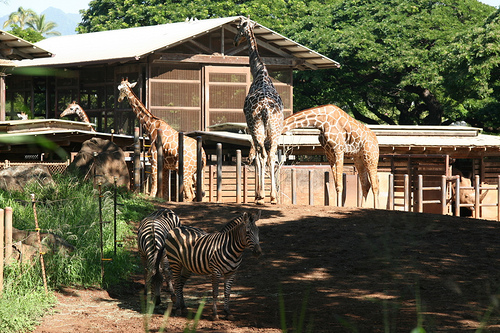

In [18]:
display(Image(show_image(2405292), width=300, unconfined=False))